# 7. 의사결정 트리와 앙상블(Decision Tree & Ensemble)

## 의사결정나무(Decision Tree)

여러 가지 규칙을 순차적으로 적용하면서 독립 변수 공간을 분할하는 분류 모형이다. 분류(classification)와 회귀 분석(regression)에 모두 사용될 수 있기 때문에 CART(Classification And Regression Tree)라고도 한다.

### 불순도/불확실성

분류나무는 구분한 뒤에 각 영역의 순도(homogeneity)가 증가, 불순도(impurity)혹은 불확실성(uncertainty)이 최대한 감소하도록 하는 방향으로 학습을 진행한다.

ref) https://datascienceschool.net/view-notebook/16c28c8c192147bfb3d4059474209e0a/ <br>
https://ratsgo.github.io/machine%20learning/2017/03/26/tree/

### Scikit-Learn의 의사결정나무 클래스

Iris 데이터를 사용해서 분류 실습<br>
**Iris 데이터 : 4가지 Feature(꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이)과 세 종류의 붓꽃 라벨로 구성**

---
- DecisionTreeClassifier() 
    - max_depth : 트리의 층
    - min_samples_split : 각 트리 별 노드의 개수

In [14]:
# Scikit-Learn의 의사결정나무 클래스

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.tree import export_graphviz

# iris 데이터 세트 불러오기
iris= load_iris()

# iris 데이터 세트 Train과 Test 분할하기 , Train : Test = 8 : 2
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2 )

# 의사결정트리 불러오기
dtree = DecisionTreeClassifier()

# 의사결정트리 학습
dtree.fit(X_train, y_train)

# 검증 데이터로 결과 예측
pred = dtree.predict(X_test)
print('검증 데이터 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

검증 데이터 정확도 : 0.9333


---

## 앙상블(Ensemble)

머신러닝에서 여러개의 모델을 학습시켜 그 모델들의 예측결과들을 이용해 하나의 모델보다 더 나은 값을 예측하는 방법

종류 : 랜덤포레스트,배깅,부스팅,스태킹 등

### Voting
Voting은 의미 그대로 투표를 통해 값을 결정하는 것입니다. Voting은 Hard voting과 Soft voting이 있습니다.
- Hard Voting : 다수의 분류기가 예측한 값을 최종 값으로 선택
- Soft Voting : 각 레이블 별로 예측 확률을 낸 후 평균을 내어 최종 값으로 선택

일반적으로 Soft voting이 성능이 더 좋아 더 많이 사용됩니다.

---
https://datascienceschool.net/view-notebook/766fe73c5c46424ca65329a9557d0918/
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

- VotingClassifier(estimators, voting) 
    - estimators : 앙상블 학습을 진행할 다른 분류기 설정
    - voting : voting 방식 선택

In [1]:
# Voting

import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 유방암 데이터 불러오기
cancer = load_breast_cancer()

# 데이터 프레임을 만들기
data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

# Voting과 비교할 각각 다른 분류기 불러오기
# KNeighborsClassifier, LogisticRegression
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors = 8) #(n_neighbors = 8) 꼭 설정할 필요는 없음

# Voting에 사용할 분류기
# 분류기로 LogisticRegressor와 KNeighborClassifier를 사용합니다.
# Voting 방식은 Soft Voting을 사용합니다.
vo_clf = VotingClassifier(estimators =[('LR',lr_clf),('KNN',knn_clf)] , voting ='soft')

# 학습 데이터와 검증 데이터로 나누기
X_train, X_test, y_train,y_test = train_test_split(cancer.data,cancer.target, test_size = 0.2, random_state = 156)

# Voting Classifier 학습
vo_clf.fit(X_train,y_train)

# Voting 결과 예측
pred = vo_clf.predict(X_test)
print('Voting Classifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

# 다른 분류기를 각각 학습했을 때 결과 예측
# classifiers에 lr_clf, knn_clf를 넣어주세요.
classifiers = [lr_clf,knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print("{0} 정확도 : {1:.4f}".format(class_name, accuracy_score(y_test, pred)))



Voting Classifier 정확도 : 0.9561
LogisticRegression 정확도 : 0.9474
KNeighborsClassifier 정확도 : 0.9386


C:\Users\97030\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\97030\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Bagging (bootstrap aggregating) & Pasting

- 다른 훈련 데이터 사용
- 같은 알고리즘 사용
- 예측값 추합

**Bagging : 복원 추출**

**Pasting : 비복원 추출**

----
Scikit-Learn은 배깅과 페이스팅을 간편하게 사용할 수 있도록 분류일 경우에는 BaggingClassifier를 회귀일 경우 BaggingRegressor를 제공한다.

---

- GridSearchCV() 
    - estimator : Classifier, Regressor, pipeline 등이 사용됩니다.
    - param_gird : Dictionary 값이 주어집니다. estimator의 튜닝을 위해 파라미터 명과 값을 지정합니다.
    - scoring : 예측 성능을 측정할 평가 방법을 지정합니다.
    - cv : 교차 검증을 위해 분할되는 학습/테스트 개수를 지정합니다.
    - refit : 가장 최적의 하이퍼 파라미터를 찾은 후 estimator 객체를 해당 하이퍼 파라미터로 재학습시킵니다. (default = True)
---
- GridSearchCV() 속성  
    - best_params_ : 최적의 파라미터 반환
    - best_score_ : 최고 정확도 반환
    - best_estimator_ : 최적의 파라미터로 학습된 estimator 반환

In [2]:
# Bagging & Pasting

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 유방암 데이터 세트 불러오기
bc = load_breast_cancer()

# 학습 데이터와 검증 데이터로 분할하기
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size = 0.2, random_state = 121)

# RandomForestClassifier 객체 불러오기
rfc = RandomForestClassifier()

# GridSearchCV에 넣을 파라미터
param ={
    'n_estimators'      : [1],
    'max_depth'         : [1,2,3],
    'min_samples_leaf'  : [1,2,3],
    'min_samples_split' : [2,3]
}

# GridSearchCV 불러오기
grid_rfc = GridSearchCV(rfc, param_grid = param)

# RandomForestClassifier 학습
grid_rfc.fit(X_train, y_train)

# 최적의 파라미터와 최고 예측 정확도 계산
print('최적 파라미터      : ', grid_rfc.best_params_)
print('최고 예측 정확도   : {0:.4f}'.format(grid_rfc.best_score_))

# 최적의 파라미터로 학습된 트리 Estimator 가져오기
estimator = grid_rfc.best_estimator_

# 검증 데이터로 결과 예측
pred = estimator.predict(X_test)
print('검증 데이터 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))


최적 파라미터      :  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 1}
최고 예측 정확도   : 0.9363
검증 데이터 정확도 : 0.9561


C:\Users\97030\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


### OOB(Out-of-Bag) 평가

배깅은 중복을 허용하는 리샘플링(resampling) 즉, 부트스트래핑(bootstraping) 방식이기 때문에 전체 학습 데이터셋에서 어떠한 데이터 샘플은 여러번 샘플링 되고, 또 어떠한 샘플은 전혀 샘플링 되지 않을 수가 있다. 평균적으로 학습 단계에서 전체 학습 데이터셋 중 63% 정도만 샘플링 되며(자세한 내용은 여기 참고), 샘플링 되지 않은 나머지 37% 데이터 샘플들을 oob(out-of-bag) 샘플이라고 한다.

앙상블(배깅) 모델의 학습 단계에서는 oob 샘플이 사용되지 않기 때문에, 이러한 oob 샘플을 검증셋(validation set)이나 교차검증(cross validation)에 사용할 수 있다.

Scikit-Learn에서는 BaggingClassifier의 인자인 oob_score=True로 설정하면 학습이 끝난 후 자동으로 oob 평가를 할 수 있다.

### 랜덤 포레스트 (Random Forest)

배깅(bagging)을 적용한 의사결정나무(decision tree)의 앙상블이다. Scikit-Learn에서는 랜덤 포레스트를 간편하게 쓸 수 있도록 RandomForestClassifier를 제공 한다.

Out-of-bag score estimate: 0.946
Mean accuracy score: 0.921


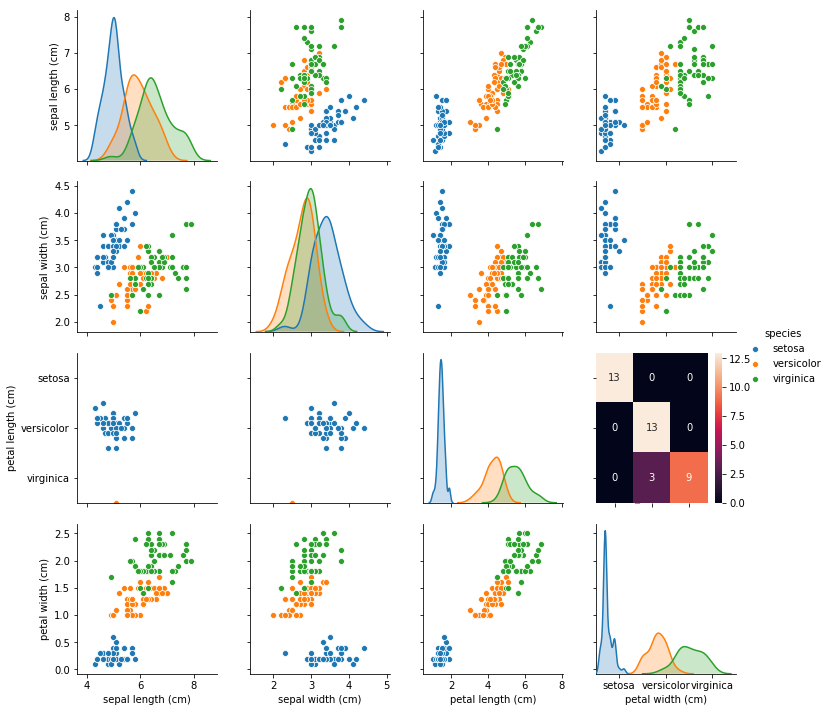

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

# sklearn provides the iris species as integer values since this is required for classification
# here we're just adding a column with the species names to the dataframe for visualisation
df['species'] = np.array([iris.target_names[i] for i in iris.target])

sns.pairplot(df, hue='species')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], iris.target, test_size=0.25, stratify=iris.target, random_state=123456)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)
sns.heatmap(cm, annot=True)

## Boosting

부스팅은 지금까지 본 앙상블 방법과 조금 상이하다. 독립적인 모델을 합산하여 산출하기 보다는 기존의 모델을 개선시키는 방향이다.

### 아다부스트(AdaBoost)

종속시행이 핵심 아이디어. 처음 Training Data를 통해 만든 모델에서 오분류한 데이터가 뽑힐 확률을 높이는 방식.

- 장점 : 오분류 데이터에 대해 모델을 적합할 수 있음.
- 단점 : 잘못하면 분산이 높아질 수 있음. 계산 과정에 있어 병렬 수행이 불가능함. 따라서 느려짐

### 그래디언트 부스팅(Gradient Boosting)

맞추지 못한 데이터를 더 많이 적합 시키는 방법보다는 오차에 대해 적합을 수행하는 방법.
그 오차는 손실 함수로 표현되고, 이 손실 함수를 최적화하는데 있어 Gradient Descent를 사용함.